In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

## Heart failure clinical records Data Set

Dataset Information: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

## Load dataset

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Transform columns

- cast `age` column to `int`, almost all rows contain integer `age` anyway
<!-- - cast 0/1 values to boolean for `anaemia`, `diabetes`, `high_blood_pressure`, `smoking` and `death_event` columns. -->
- change upper snake case column names to lower snake case

In [3]:
df = df.rename(columns={"DEATH_EVENT": "death_event"})
df = df.rename(columns={"sex": "is_woman"})

df["age"] = df["age"].map(int)
df["anaemia"] = df["anaemia"].map(bool)
df["diabetes"] = df["diabetes"].map(bool)
df["high_blood_pressure"] = df["high_blood_pressure"].map(bool)
df["is_woman"] = df["is_woman"].map(bool)
df["smoking"] = df["smoking"].map(bool)
df["death_event"] = df["death_event"].map(bool)

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,is_woman,smoking,time,death_event
0,75,False,582,False,20,True,265000.00,1.9,130,True,False,4,True
1,55,False,7861,False,38,False,263358.03,1.1,136,True,False,6,True
2,65,False,146,False,20,False,162000.00,1.3,129,True,True,7,True
3,50,True,111,False,20,False,210000.00,1.9,137,True,False,7,True
4,65,True,160,True,20,False,327000.00,2.7,116,False,False,8,True


## Determine column type

Categorical vs numerical

In [4]:
categorical_cols = [
    "anaemia",
    "diabetes",
    "high_blood_pressure",
    "is_woman",
    "smoking",
    "death_event",
]

numerical_cols = [
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "time",
]

categorical_df = df[categorical_cols]
numerical_df = df[numerical_cols]

numerical_df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


## Demographics

Most of the patients are between 50 and 75 years old

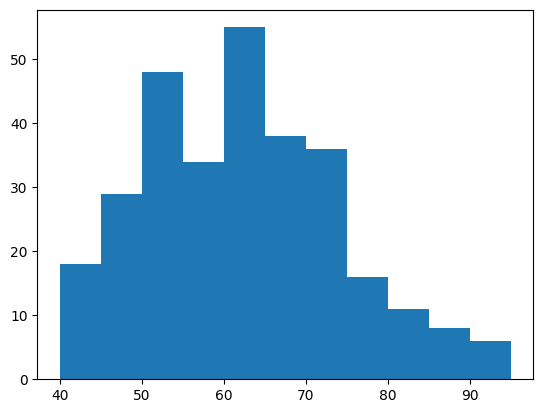

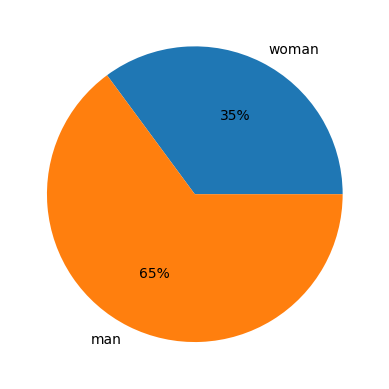

In [5]:
min_age = df["age"].min()
max_age = df["age"].max()

plt.hist(df["age"], bins=(max_age-min_age)//5)
plt.show()

plt.pie(df.groupby('is_woman').size(), labels=["woman", "man"], autopct='%.0f%%')
plt.show()

## Expolore possible corelations with age

In order to better understand dataset, corelations with age were explored.
Because main focus of the study was tracking death of patiens, on the plots `death event` feature was marked with color.

Observations:
- variation of the ejection fraction decreases with age, though it might be caused by small sample size at age 80+
- patients who died more often had low ejection fraction

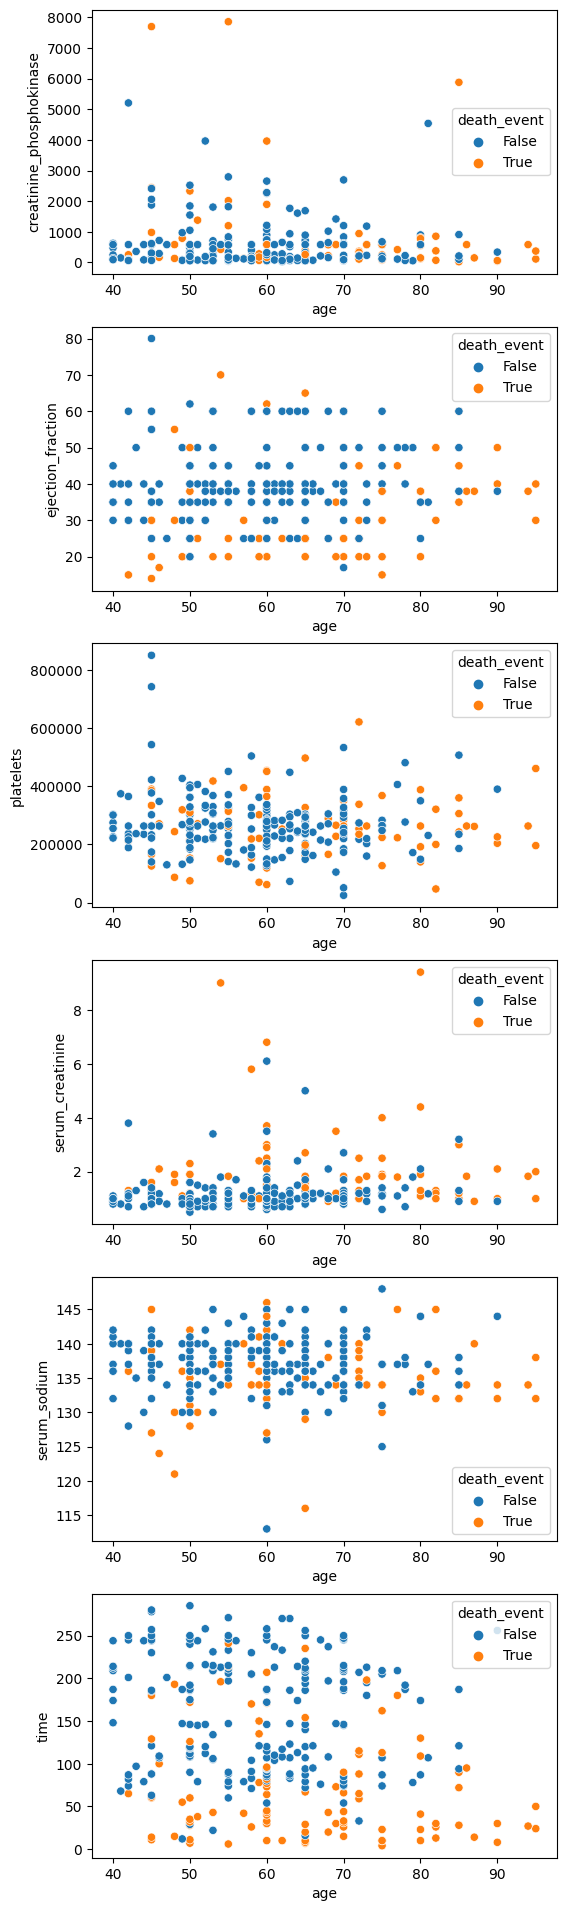

In [6]:
cols =  [c for c in numerical_cols if c != "age"]
fig, axes = plt.subplots(len(cols), figsize=(6, len(cols)*4))

for ax, col in zip(axes, cols):
    sns.scatterplot(ax=ax, x='age', y=col, hue=df["death_event"], data=df)

plt.show()

## Highest biserial correlations

In the first step correlations between categorical features and numerical features, for all posible combinations of those, has been calculated. They where sorted from the highest absolute value to the lowest absolute value. Finally they where presented as box plots.

Observations:
- `time` (follow up period) corelations are hard to interptet because this variable was controled by the personel conducting the study, and reasons for choosing lenght of the follow up period are not immediately clear
- strongest corelation of `death_event` is with `serum_creatinine` ,`ejection_fraction`, `age` and `serum_sodium`
- though it might be ovious, `death_event` is positively corelated with advanced age

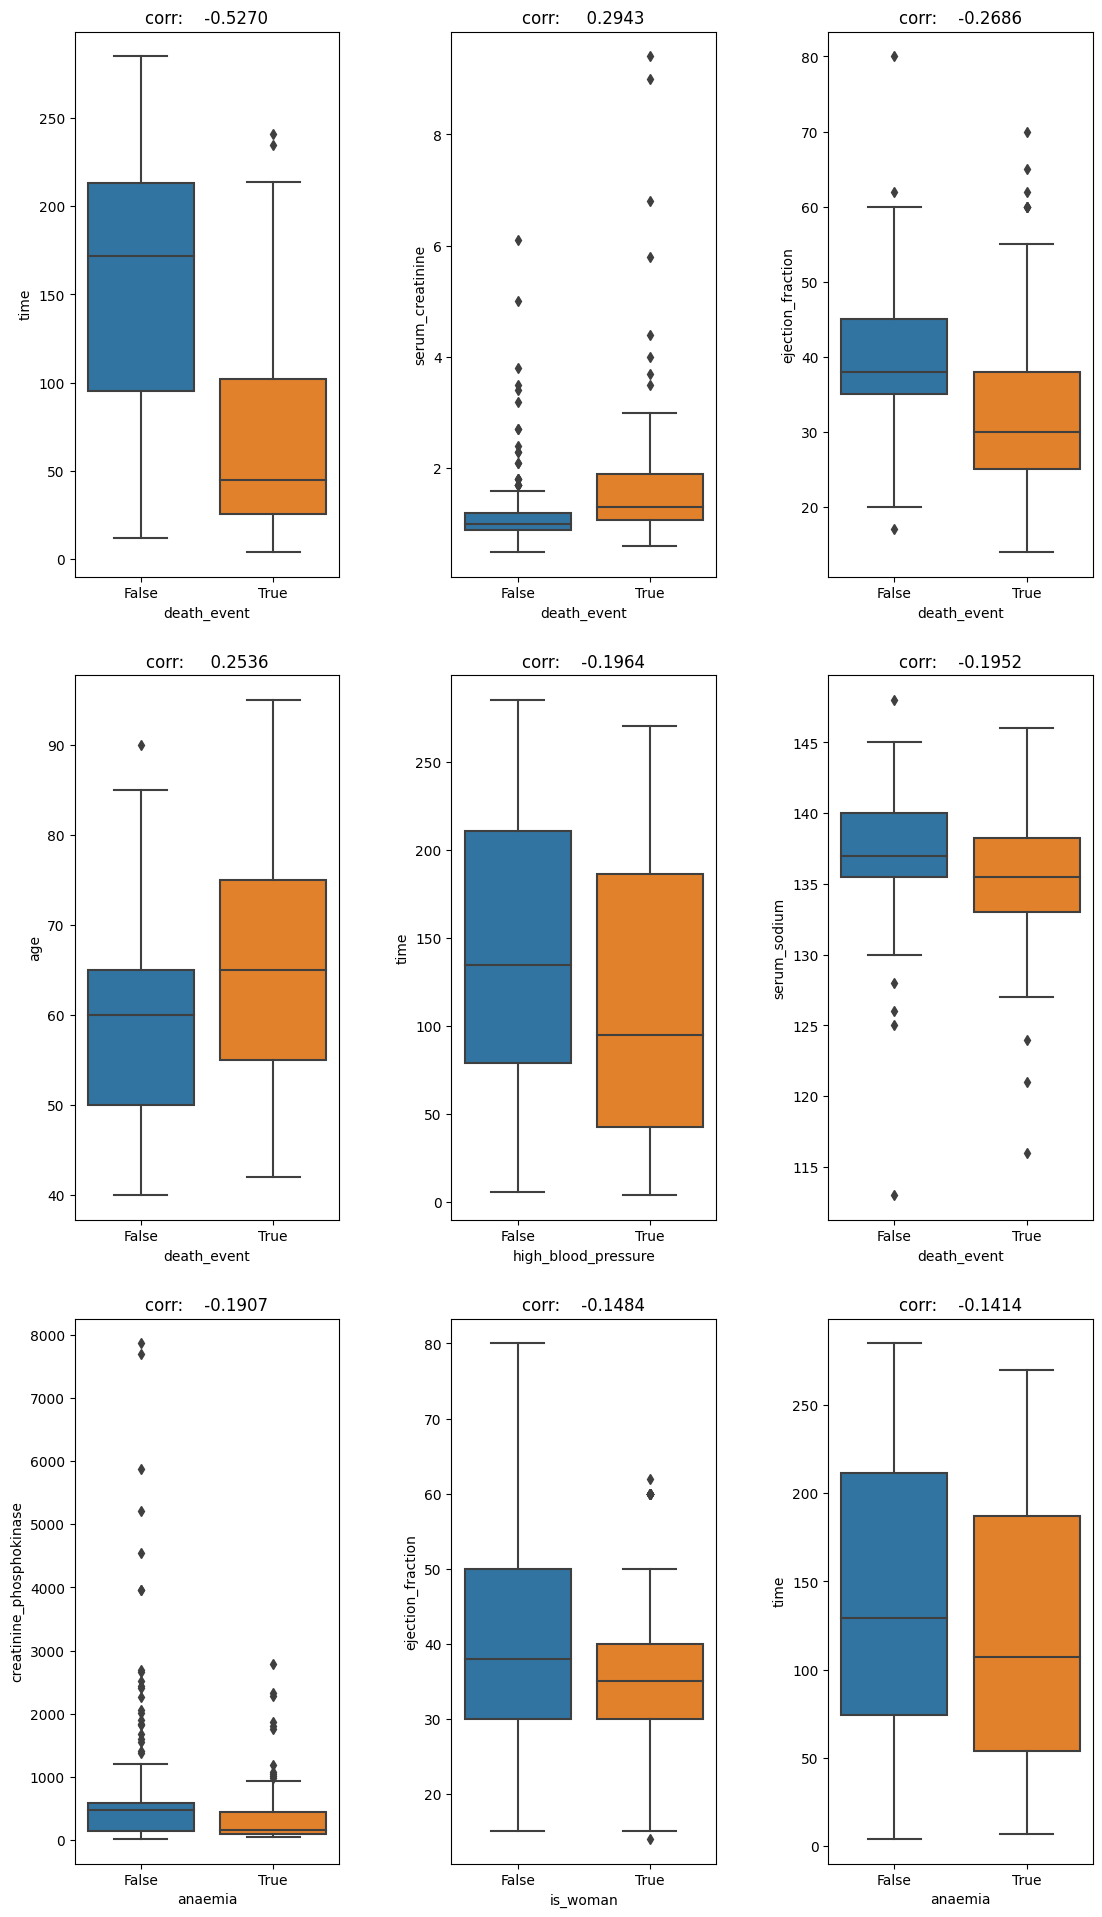

In [10]:
corrs = []

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        corr, pval = sp.stats.pointbiserialr(df[num_col], df[cat_col])
        corrs.append({
            "cat_col": cat_col,
            "num_col": num_col,
            "corr": corr,
            "pval": pval,
        })

corrs = sorted(corrs, key=lambda x: np.abs(x["corr"]), reverse=True)
fig, axes = plt.subplots(3, 3, figsize=(12, 20))
fig.tight_layout(pad=5)
axes = [ax for axes in axes for ax in axes]

for ax, corr in zip(axes, corrs[:len(axes)]):
    x, y = corr["cat_col"], corr["num_col"],
    ax.set_title("corr: {:10.4f}".format(corr["corr"]))
    sns.boxplot(ax=ax, x=x, y=y, data=df)